In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from decision_trees.config import data_path
from decision_trees.plotting_utils import *

sns.set_context("talk")

# settings
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'decision_trees'

## 1. Load In Data

Load in data (cleaned if was necessary)

In [8]:
fpath = "processed/breast_cancer.csv"
df = pd.read_csv(data_path / fpath)
df.head()

NameError: name 'data_path' is not defined

## 2. Describe data

Things to consider:
* datatypes: cat, float, int, datetime
* distributions of numerical data ~ predictor
* multi-variate distributions 

https://ieee-dataport.org/open-access/seer-breast-cancer-data

more info on 6th edition stages: https://seer.cancer.gov/seerstat/variables/seer/ajcc-stage/6th/

Columns:

'Age': age of px at dx,

'Race': White, Black, Other, Other-Unspecified, Unknown (Other=Asian, Pacific Islander, American Indian)

'Marital Status': Single, Married, Separated, Divorced, Widowed. at time of dx,

'T Stage': size and extent of the main tumor (bigger is worse). T1-T4,

'N Stage': number of nearby affected lymph nodes. N1-N3,

'6th Stage': what stage of cancer - 6th edition stage of cancer, increases from IIA->IIB->IIIA->IIIB->IIIC,

'differentiate': range from Well->Moderate->Poorly->Undifferentiated, where undifferentiated is the worst,

'Grade': range from 1-4 (numerical encoding of "differentiate" column),

'A Stage': Regional or Distant. Distant means more metastasized (worse),

'Tumor Size': exact size in mm,

'Estrogen Status': if the tumor is Positive or Negative for estrogen receptors (if cancer cells are estrogen positive, it means it has receptors for estrogen, meaning estrogen levels affect the growth of the tumor. determining which receptor type you're positive for (estrogen and/or progesterone) determines what treatment options you have),

'Progesterone Status': Positive or Negative to progesterone receptors, same concept as estrogen,

'Regional Node Examined': total number of regional lymph nodes that were removed and examined by the pathologist,

'Regional Node Positive': total number of regional lymph nodes that were examined and found to be positive,

'Survival Months': amount of time px has survived since dx (if px is alive, this number is the min number of months they've survived, could be longer),

'Status': Alive or Dead

In [7]:
df.info()

NameError: name 'df' is not defined

## 3. Plot Data

[X] Pair plot, hue on survival status

[ ] Bi-variate plots ~ survival (e.g. n stage versus t stage colored by survival) (IN PROGRESS)

[ ] Correlation analysis/heatmap of numerical variables 

[ ] Distribution of survival months ~ survival status

[ ] P(survive) ~ survival months

[ ] Decide if we need to truncate is_alive depending on month


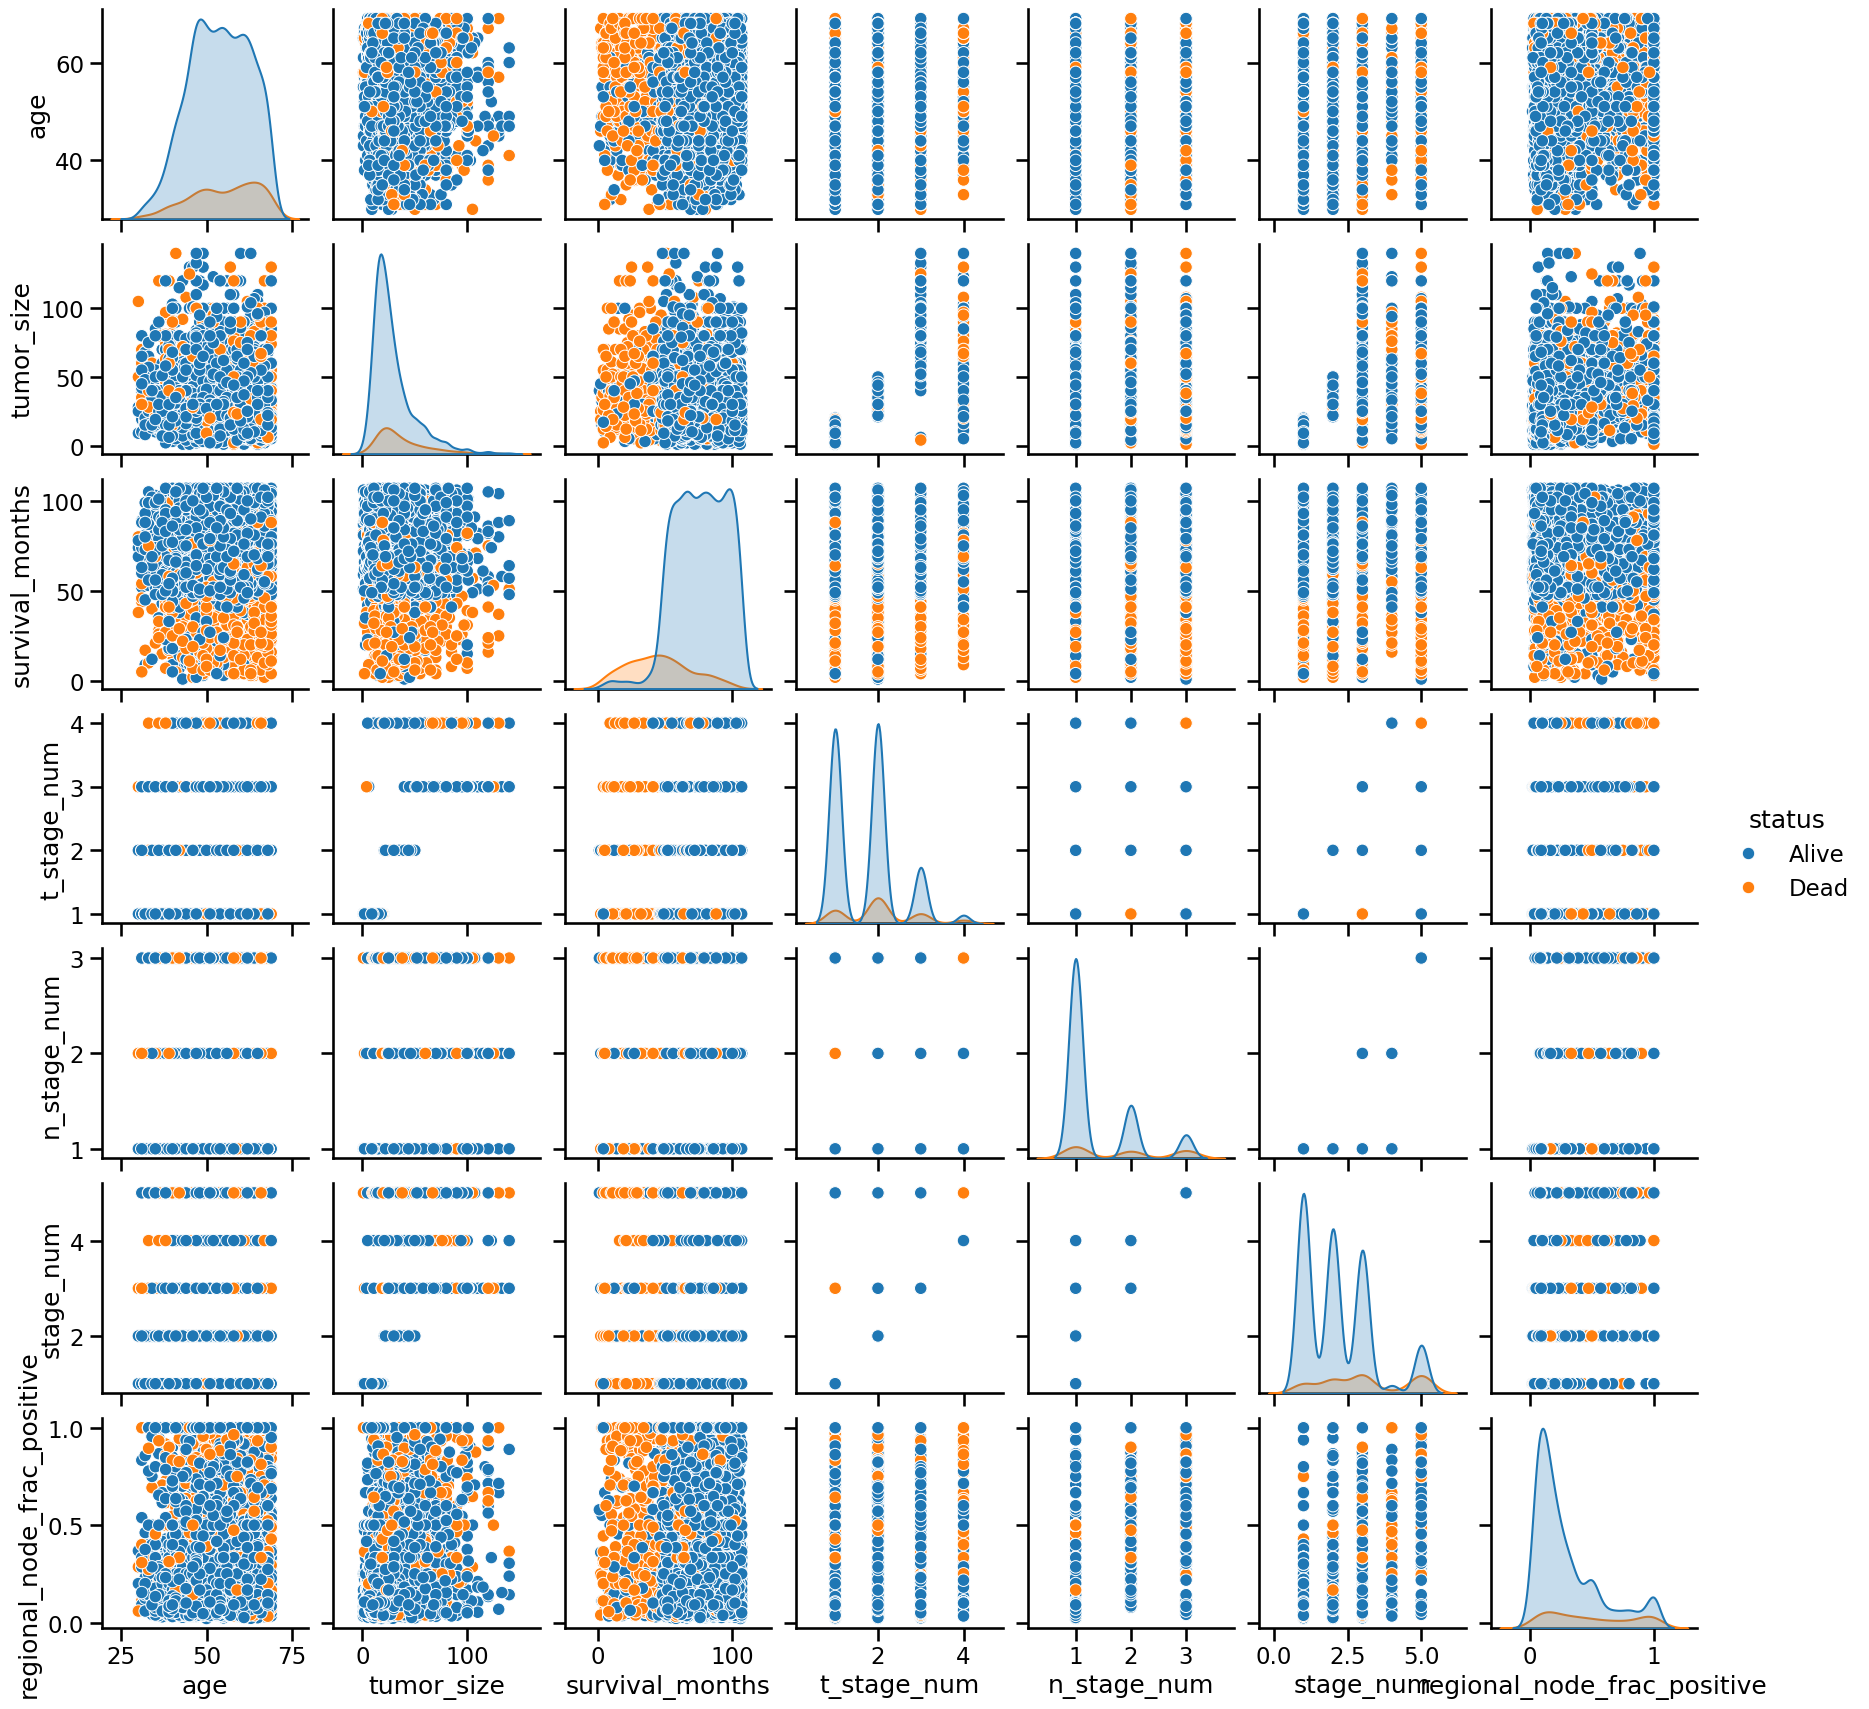

In [ ]:
sns.pairplot(
    df.drop(
        columns=[
            "has_progesterone",
            "has_estrogen",
            "is_metastasized",
            "is_alive",
            "regional_node_examined",
            "regional_node_positive",
        ]
    ),
    hue="status",
)

In [ ]:
def jitter_plot(df, x_col, y_col, hue_col="status", jitter_amount=0.4, ax=None):
    """
    quick fx for jitter scatter plot
    """
    if ax is None:
        ax = mf((8, 6))

    x_jittered = df[x_col] + np.random.uniform(-jitter_amount, jitter_amount, len(df))
    y_jittered = df[y_col] + np.random.uniform(-jitter_amount, jitter_amount, len(df))

    # Create a scatter plot with jittered data
    sns.scatterplot(x=x_jittered, y=y_jittered, hue=df[hue_col], alpha=0.5, ax=ax)

    ax.legend(bbox_to_anchor=(1.05, 1))

    return None

In [ ]:
def pivot_to_heat_map(df, columns, index, values="is_alive", margins=True, ax=None):
    if ax is None:
        ax = mf((6, 5))

    pivot = df.pivot_table(
        columns=columns,
        index=index,
        values=values,
        aggfunc="mean",
        margins=margins,
    )

    sns.heatmap(pivot, cmap="rocket", ax=ax)

    return None

('t_stage_num', 'n_stage_num')
('stage_num', 't_stage_num')
('stage_num', 'n_stage_num')


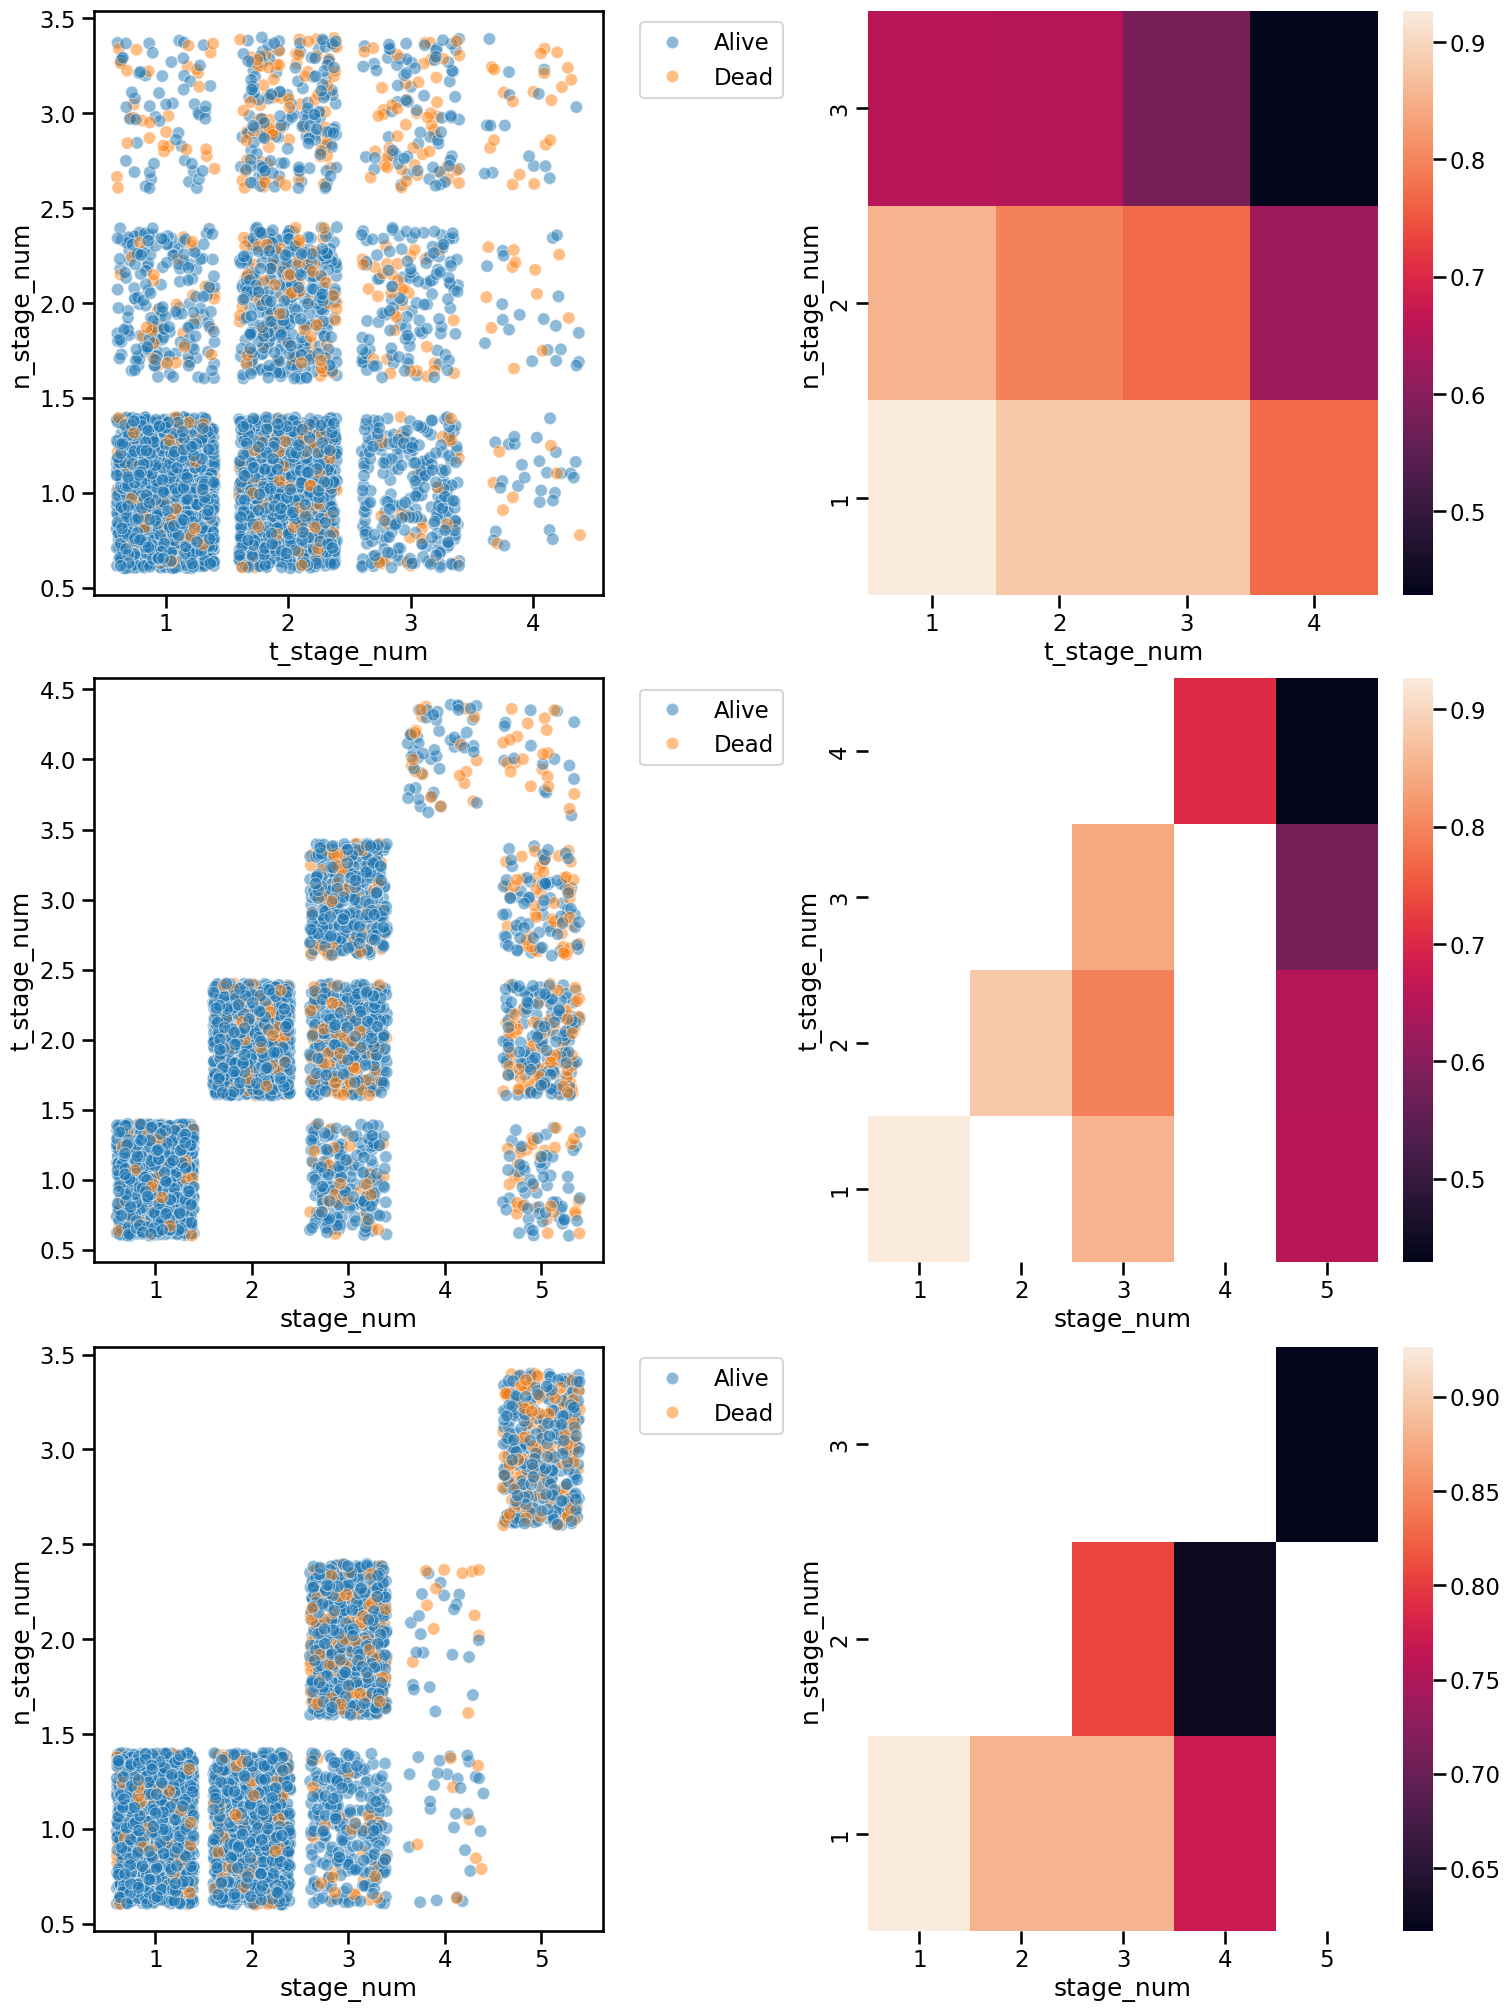

In [ ]:
pairs = [
    ("t_stage_num", "n_stage_num"),
    ("stage_num", "t_stage_num"),
    ("stage_num", "n_stage_num"),
]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20), constrained_layout=True)
for ii, pair in enumerate(pairs):
    print(pair)
    jitter_plot(df, x_col=pair[0], y_col=pair[1], ax=ax[ii, 0])
    pivot_to_heat_map(df, columns=pair[0], index=pair[1], ax=ax[ii, 1], margins=False)
    ax[ii, 1].invert_yaxis()

In [ ]:
def generate_cat_vs_numeric(df, x, y, violin_inner="stick"):

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

    sns.stripplot(data=df, x=x, y=y, ax=ax[0])
    sns.boxplot(data=df, x=x, y=y, ax=ax[1])
    sns.violinplot(data=df, x=x, y=y, inner=violin_inner, ax=ax[2])


    return None

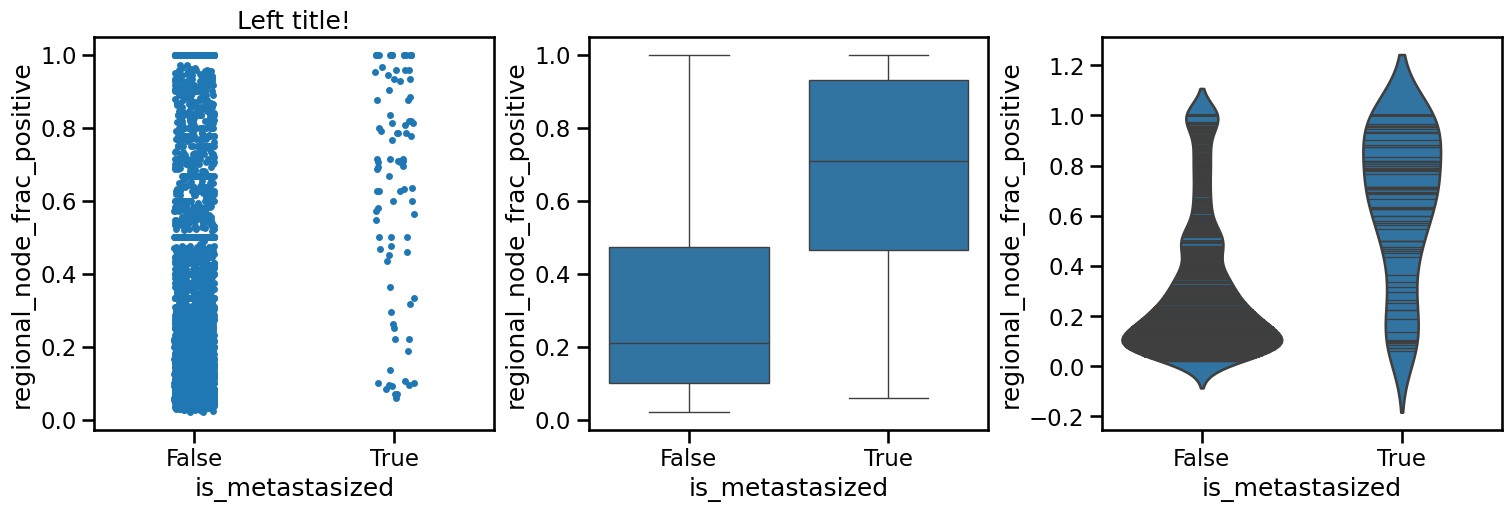

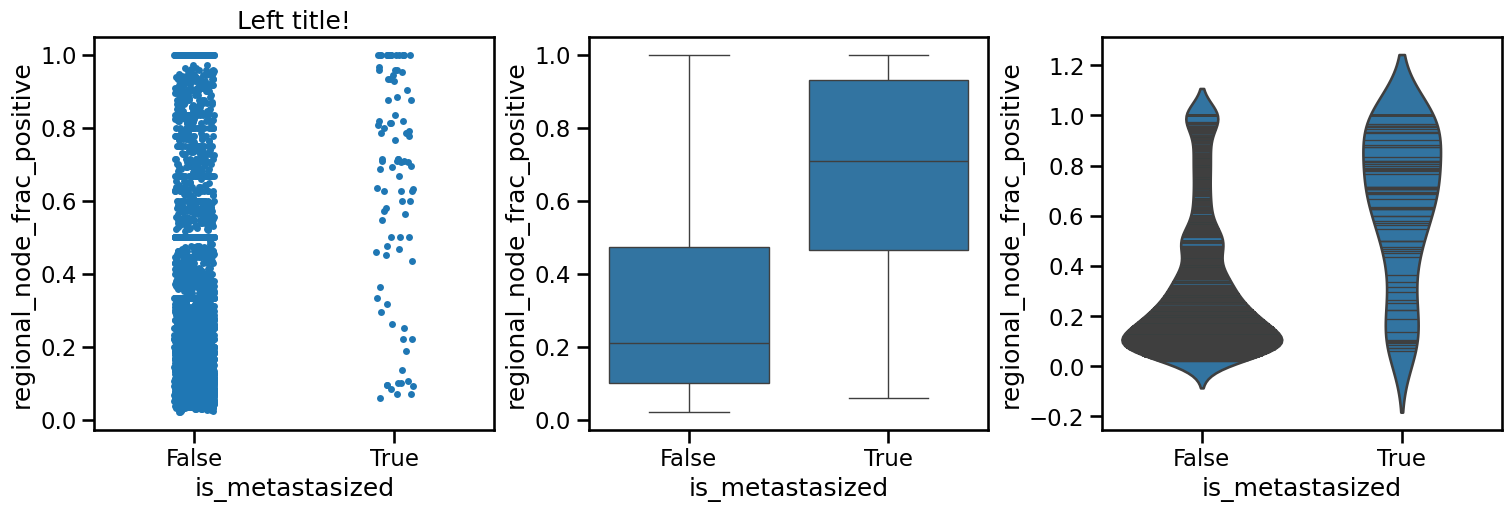

In [ ]:
for i in range(2):
    generate_cat_vs_numeric(df, x="is_metastasized", y="regional_node_frac_positive")

In [ ]:
def example_plot_histogram(df, x_val, ax=None, title="", **kwargs):
    """
    Example function to plot a histogram using seaborn

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe containing the data to plot
    x_val : str
        Name of the column to plot
    ax : matplotlib.axes.Axes, optional
        Axes to plot on, by default None
    title : str, optional
        Title of the plot, by default ""
    **kwargs : dict
        Additional arguments to pass to seaborn.histplot,
        e.g. hue="var_name", ="stack"

    Returns
    -------
    matplotlib.axes.Axes
        Axes containing the plot
    """
    if ax is None:
        ax = mf()

    sns.histplot(data=df, x=x_val, ax=ax, **kwargs)

    ax.set_title(title)

    return ax

<Axes: xlabel='age', ylabel='Count'>

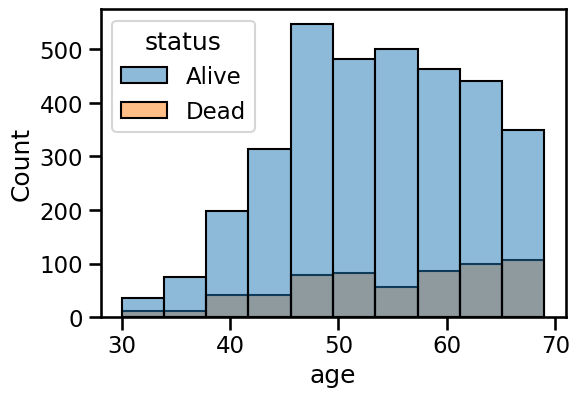

In [ ]:
example_plot_histogram(df, x_val="age", hue="status", bins=10)

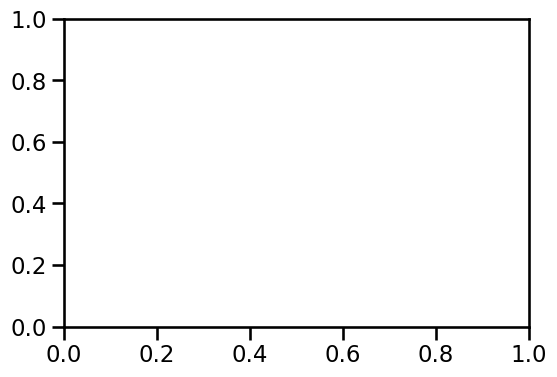

In [ ]:
ax = mf((6, 4))  # mf = "make figure" from plot utils